<a href="https://colab.research.google.com/github/keerthans334/python--programs/blob/main/Essentials_of_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Program: Read a text file line by line with line numbers and handle FileNotFoundError
filename = input("Enter the file name (with extension): ")

try:
    # Open file in read mode using 'with' for safe handling
    with open(filename, 'r') as file:
        # Read each line with line number using enumerate
        for lineno, line in enumerate(file, start=1):
            # Strip newline for clean display
            print(f"{lineno}: {line.strip()}")
except FileNotFoundError:
    # Handle the case where file is not found
    print(f"Error: The file '{filename}' was not found.")
except Exception as e:
    # Handle any other unexpected errors
    print(f"An unexpected error occurred: {e}")


Enter the file name (with extension): graph_file (1).csv
1: A,B
2: A,C
3: A,D
4: B,E
5: B,F
6: C,G
7: C,H
8: D,I
9: D,J
10: E,K
11: F,K
12: G,L
13: H,L
14: I,M
15: J,M
16: K,N
17: L,N
18: M,N


In [ ]:
import csv
import json
import os

filename = input("Enter file name (with extension): ")

# Get file extension
_, ext = os.path.splitext(filename)
ext = ext.lower()

try:
    if ext == ".csv":
        with open(filename, 'r', encoding='utf-8') as f:
            reader = csv.DictReader(f)
            for i, row in enumerate(reader, start=1):
                if "" in row.values():
                    print(f"Warning: Record {i} has missing data → {row}")
                else:
                    print(f"Record {i}: {row}")

    elif ext == ".json":
        with open(filename, 'r', encoding='utf-8') as f:
            data = json.load(f)
            # Make sure it's a list
            if isinstance(data, dict):
                data = [data]
            for i, record in enumerate(data, start=1):
                if "" in record.values():
                    print(f"Warning: Record {i} has missing data → {record}")
                else:
                    print(f"Record {i}: {record}")
    else:
        print("Only CSV or JSON files are supported.")

except FileNotFoundError:
    print(f"Error: File '{filename}' not found.")
except (json.JSONDecodeError, csv.Error) as e:
    print(f"File format error: {e}")


Enter file name (with extension): weather.csv
Record 1: {'date': '2025-08-10', 'temperature': '30', 'humidity': '70'}
Record 2: {'date': '2025-08-11', 'temperature': '28', 'humidity': '65'}
Record 3: {'date': '2025-08-12', 'temperature': '29', 'humidity': '60'}
Record 4: {'date': '2025-08-13', 'temperature': '31', 'humidity': '72'}
Record 5: {'date': '2025-08-14', 'temperature': '27', 'humidity': '68'}


In [ ]:
class Graph:
    def __init__(self, directed=False):
        self.directed = directed
        self.nodes = []
        self.adj_list = {}
        self.adj_matrix = []

    def add_node(self, node):
        if node in self.nodes:
            print("Node already exists!")
            return
        self.nodes.append(node)
        self.adj_list[node] = []
        for row in self.adj_matrix:
            row.append(0)
        self.adj_matrix.append([0] * len(self.nodes))
        print(f"Node {node} added.")

    def remove_node(self, node):
        if node not in self.nodes:
            print("Node not found!")
            return
        idx = self.nodes.index(node)
        self.nodes.remove(node)
        self.adj_list.pop(node)
        for n in self.adj_list:
            if node in self.adj_list[n]:
                self.adj_list[n].remove(node)
        self.adj_matrix.pop(idx)
        for row in self.adj_matrix:
            row.pop(idx)
        print(f"Node {node} removed.")

    def add_edge(self, src, dest):
        if src not in self.nodes or dest not in self.nodes:
            print("One or both nodes not found!")
            return
        if dest not in self.adj_list[src]:
            self.adj_list[src].append(dest)
            self.adj_matrix[self.nodes.index(src)][self.nodes.index(dest)] = 1
        if not self.directed:
            if src not in self.adj_list[dest]:
                self.adj_list[dest].append(src)
                self.adj_matrix[self.nodes.index(dest)][self.nodes.index(src)] = 1
        print(f"Edge {src} -> {dest} added.")

    def remove_edge(self, src, dest):
        if src not in self.nodes or dest not in self.nodes:
            print("One or both nodes not found!")
            return
        if dest in self.adj_list[src]:
            self.adj_list[src].remove(dest)
            self.adj_matrix[self.nodes.index(src)][self.nodes.index(dest)] = 0
        if not self.directed:
            if src in self.adj_list[dest]:
                self.adj_list[dest].remove(src)
                self.adj_matrix[self.nodes.index(dest)][self.nodes.index(src)] = 0
        print(f"Edge {src} -> {dest} removed.")

    def display(self):
        print("\nAdjacency List:")
        for node in self.adj_list:
            print(node, ":", self.adj_list[node])
        print("\nAdjacency Matrix:")
        print("   " + " ".join(self.nodes))
        for i, row in enumerate(self.adj_matrix):
            print(self.nodes[i], " ".join(map(str, row)))


# --------- Main Program ---------
directed_choice = input("Directed graph? (y/n): ").lower() == 'y'
g = Graph(directed=directed_choice)

n = int(input("Enter number of nodes: "))
for _ in range(n):
    node = input("Enter node name: ")
    g.add_node(node)

e = int(input("Enter number of edges: "))
for _ in range(e):
    src, dest = input("Enter edge (src dest): ").split()
    g.add_edge(src, dest)

while True:
    print("\nMenu:")
    print("1. Add Node")
    print("2. Remove Node")
    print("3. Add Edge")
    print("4. Remove Edge")
    print("5. Display Graph")
    print("6. Exit")
    choice = input("Enter choice: ")

    if choice == '1':
        g.add_node(input("Enter node name: "))
    elif choice == '2':
        g.remove_node(input("Enter node name: "))
    elif choice == '3':
        src, dest = input("Enter edge (src dest): ").split()
        g.add_edge(src, dest)
    elif choice == '4':
        src, dest = input("Enter edge (src dest): ").split()
        g.remove_edge(src, dest)
    elif choice == '5':
        g.display()
    elif choice == '6':
        break
    else:
        print("Invalid choice!")


Directed graph? (y/n): y
Enter number of nodes: 5
Enter node name: A
Node A added.
Enter node name: B
Node B added.
Enter node name: C
Node C added.
Enter node name: D
Node D added.
Enter node name: E
Node E added.
Enter number of edges: 5
Enter edge (src dest): A B
Edge A -> B added.
Enter edge (src dest): B C
Edge B -> C added.
Enter edge (src dest): A C 
Edge A -> C added.
Enter edge (src dest): D C
Edge D -> C added.
Enter edge (src dest): B E 
Edge B -> E added.

Menu:
1. Add Node
2. Remove Node
3. Add Edge
4. Remove Edge
5. Display Graph
6. Exit
Enter choice: 5

Adjacency List:
A : ['B', 'C']
B : ['C', 'E']
C : []
D : ['C']
E : []

Adjacency Matrix:
   A B C D E
A 0 1 1 0 0
B 0 0 1 0 1
C 0 0 0 0 0
D 0 0 1 0 0
E 0 0 0 0 0

Menu:
1. Add Node
2. Remove Node
3. Add Edge
4. Remove Edge
5. Display Graph
6. Exit
Enter choice: 2
Enter node name: E
Node E removed.

Menu:
1. Add Node
2. Remove Node
3. Add Edge
4. Remove Edge
5. Display Graph
6. Exit
Enter choice: 1
Enter node name: k
Node 

Enter file type (csv/json): json
Enter file name with extension: graph_file.json
Directed graph? (y/n): y
Nodes: ['K', 'J', 'M', 'B', 'C', 'G', 'H', 'I', 'E', 'N', 'A', 'D', 'F', 'L']
Edges: [('A', 'B')]
Choose layout (spring/circular/shell): circular


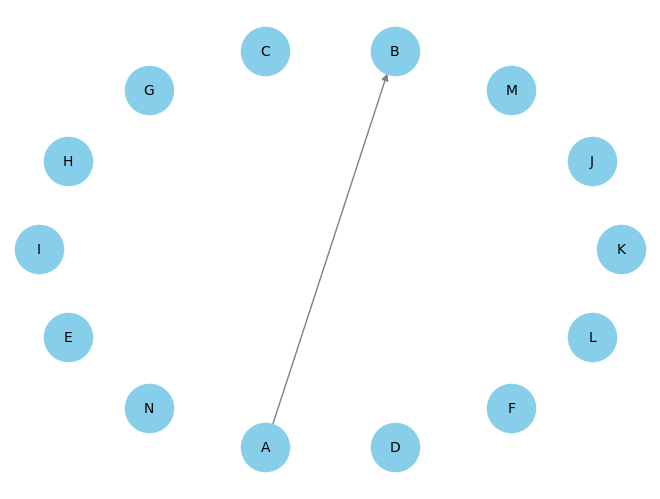

In [ ]:
import csv
import json
import networkx as nx
import matplotlib.pyplot as plt

def read_csv(file_name):
    edges = []
    with open(file_name, newline='') as csvfile:
        reader = csv.reader(csvfile)
        for row in reader:
            if len(row) >= 2:  # at least source & destination
                src, dest = row[0], row[1]
                edges.append((src, dest))
    return edges

def read_json(file_name):
    with open(file_name) as jsonfile:
        data = json.load(jsonfile)
        nodes = data.get("nodes", [])
        edges = data.get("edges", [])
        return nodes, edges

def visualize_graph(G, layout_choice="spring"):
    if layout_choice == "spring":
        pos = nx.spring_layout(G)
    elif layout_choice == "circular":
        pos = nx.circular_layout(G)
    elif layout_choice == "shell":
        pos = nx.shell_layout(G)
    else:
        pos = nx.spring_layout(G)

    nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=1200, font_size=10, edge_color='gray')
    plt.show()

# --------- Main Program ---------
try:
    file_type = input("Enter file type (csv/json): ").strip().lower()
    file_name = input("Enter file name with extension: ").strip()
    directed_choice = input("Directed graph? (y/n): ").strip().lower() == 'y'

    G = nx.DiGraph() if directed_choice else nx.Graph()

    if file_type == "csv":
        edges = read_csv(file_name)
        G.add_edges_from(edges)
    elif file_type == "json":
        nodes, edges = read_json(file_name)
        G.add_nodes_from(nodes)
        G.add_edges_from(edges)
    else:
        print("Invalid file type!")
        exit()

    print(f"Nodes: {list(G.nodes())}")
    print(f"Edges: {list(G.edges())}")

    layout_choice = input("Choose layout (spring/circular/shell): ").strip().lower()
    visualize_graph(G, layout_choice)

except FileNotFoundError:
    print("Error: File not found!")
except json.JSONDecodeError:
    print("Error: Invalid JSON format!")
except csv.Error:
    print("Error: Problem reading CSV file!")
except Exception as e:
    print("Unexpected error:", e)
